<a href="https://colab.research.google.com/github/d-maniatakos/thesis/blob/main/LSTM_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

## Import Packages

In [15]:
import pandas as pd
from kats.models.lstm import LSTMModel, LSTMParams
from kats.consts import TimeSeriesData
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.date_range(start='1949-01', end='1961-01', freq='M').to_period('M')


df.columns=['time', 'value']

In [73]:
params = LSTMParams(hidden_size=100, time_window = 100, num_epochs = 50)
data = TimeSeriesData(df)

model = LSTMModel(data=data, params=params)

In [74]:
model.fit()

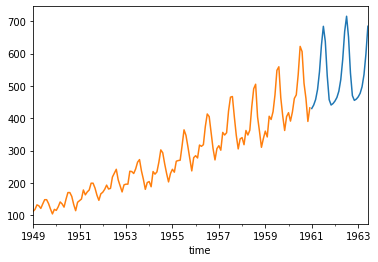

In [76]:
fcst = model.predict(
    steps=30, 
    freq="MS"
    )

# make plot to visualize
fcst_df = model.fcst_df
fcst_df.index = fcst_df['time']
fcst_df = fcst_df[['time', 'fcst']]
fcst_df.columns = ['time', 'value']
fcst_df['value'].plot()
df['value'].plot()
plt.show()